# Wine Quality Predictor

This tool predicts the quality of wine on a scale of 1–10. The prediction is based on a dataset that contains chemical properties and ratings for red and white Portuguese *Vinho Verde* wine, from the UCI Machine Learning Repository. The rating for each wine was determined by a professional wine taster.

In [17]:
########################################################################
# Press the Voila icon in the toolbar to run this as a web application #
########################################################################

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import ipywidgets as widgets
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay
from IPython.display import display, clear_output

# Prep data
# Import data file
wine_data = pd.read_csv('wine-quality-white-and-red.csv')

# Create x (feautres) and y (labels)
x = wine_data.drop('quality', axis=1)
y = wine_data['quality']

# Encode red and white wine categories as numbers
transformer = ColumnTransformer([('one_hot', OneHotEncoder(), ['type'])], remainder='passthrough')
transformed_x = transformer.fit_transform(x)

# Prep machine learning model and hyperparameters
# Use the random forest classifier model to predict wine quality
np.random.seed(244)
clf = RandomForestClassifier(n_estimators=180)

# Split data into training (80%) and test (20%) sets
x_train, x_test, y_train, y_test = train_test_split(transformed_x, y, test_size=0.2)
clf.fit(x_train, y_train)

print('Wine quality data successfully loaded.')

Wine quality data successfully loaded.


## Instructions

Enter the known chemical properties of the wine in the fields below. By default, these fields contain median values. If a property is unknown, keep the field populated with the median value.

The predicted wine quality is a value on a scale of 1-10.

In [2]:
# Display form for user input
# type
type_input = widgets.Dropdown(
    options=[('red', [0, 1]), ('white', [1, 0])],
    value=[0, 1],
    description='Type:',
)

# fixed acidity
fixed_acid_input = widgets.FloatText(
    description='Fixed acidity:',
    value=7.0
)

# volatile acidity
volatile_acid_input = widgets.FloatText(
    description='Volatile acidity:',
    value=0.29
)

# citric acid
citric_acid_input = widgets.FloatText(
    description='Citric acid:',
    value=0.31
)

# residual sugar
sugar_input = widgets.FloatText(
    description='Sugar (g):',
    value=3.0
)

# chlorides
chlorides_input = widgets.FloatText(
    description='Chlorides:',
    value=0.047
)

# free sulfur dioxide
free_sulfur_input = widgets.FloatText(
    description='Free sulfur dioxide:',
    value=29.0
)

# total sulfur dioxide
total_sulfur_input = widgets.FloatText(
    description='Total sulfur dioxide:',
    value=118.0
)

# density
density_input = widgets.FloatText(
    description='Density:',
    value=0.99489
)

# pH
pH_input = widgets.FloatText(
    description='pH:',
    value=3.21
)

# sulphates
sulphates_input = widgets.FloatText(
    description='Sulphates:',
    value=0.51
)

# alcohol
alcohol_input = widgets.FloatText(
    description='Alcohol (%):',
    value=10.3
)

# button
predict_button = widgets.Button(
    description='Predict wine quality'
)

display(type_input)
display(fixed_acid_input)
display(volatile_acid_input)
display(citric_acid_input)
display(sugar_input)
display(chlorides_input)
display(free_sulfur_input)
display(total_sulfur_input)
display(density_input)
display(pH_input)
display(sulphates_input)
display(alcohol_input)
display(predict_button)

'''
Function to make a wine quality prediction from user input.
'''
def make_prediction(self):
    global i
    i+=1
    with out:
        clear_output(wait=True)
            
        # Get user values
        user_type=type_input.value
        fixed_acid=fixed_acid_input.value
        volatile_acid=volatile_acid_input.value
        citric_acid=citric_acid_input.value
        sugar=sugar_input.value
        chlorides=chlorides_input.value
        free_sulfur=free_sulfur_input.value
        total_sulfur=total_sulfur_input.value
        density=density_input.value
        pH=pH_input.value
        sulphates=sulphates_input.value
        alcohol=alcohol_input.value

        # Generate array of x values
        arr = [fixed_acid, volatile_acid, citric_acid, sugar, chlorides, free_sulfur, total_sulfur, density, pH, sulphates, alcohol]
    
        # Concatenate encoded type value
        user_data = [np.concatenate((user_type, arr))]
    
        # Return prediction
        quality_array = np.array(clf.predict(user_data))
        quality_pred = quality_array[0]
        print(f'Predicted wine quality: {quality_pred} out of 10\n'
                 f'Accuracy: {clf.score(x_test, y_test) * 100:.2f}%')
i=0

out = widgets.Output()
display(out)

# Make prediction on button click
predict_button.on_click(make_prediction)

Dropdown(description='Type:', options=(('red', [0, 1]), ('white', [1, 0])), value=[0, 1])

FloatText(value=7.0, description='Fixed acidity:')

FloatText(value=0.29, description='Volatile acidity:')

FloatText(value=0.31, description='Citric acid:')

FloatText(value=3.0, description='Sugar (g):')

FloatText(value=0.047, description='Chlorides:')

FloatText(value=29.0, description='Free sulfur dioxide:')

FloatText(value=118.0, description='Total sulfur dioxide:')

FloatText(value=0.99489, description='Density:')

FloatText(value=3.21, description='pH:')

FloatText(value=0.51, description='Sulphates:')

FloatText(value=10.3, description='Alcohol (%):')

Button(description='Predict wine quality', style=ButtonStyle())

Output()

## Visualizations of wine quality data

Use the following visualizations to examine and explore the data used to make this prediction.

### Scatter plot: alcohol vs. quality

Alcohol content is one of the factors that influences wine quality. This scatter plot shows the correlation.

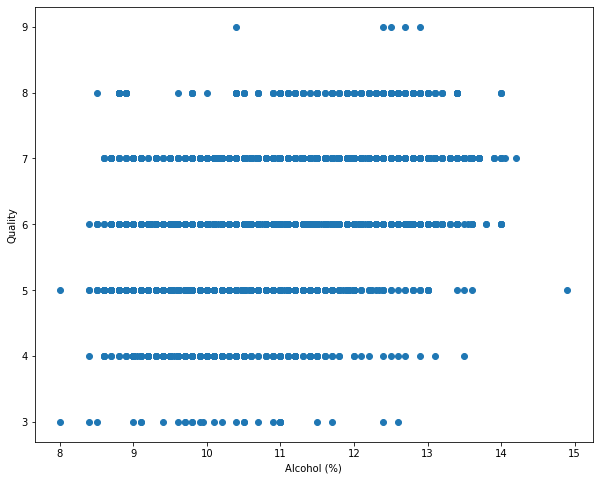

In [3]:
plt.figure(figsize=(10,8))
plt.scatter(x=wine_data['alcohol'], y=wine_data['quality'])
plt.xlabel("Alcohol (%)")
plt.ylabel("Quality")
plt.show();

## Bar graph: distribution of wine quality

This bar graph shows the number of red and white wines in the data set for each quality rating.

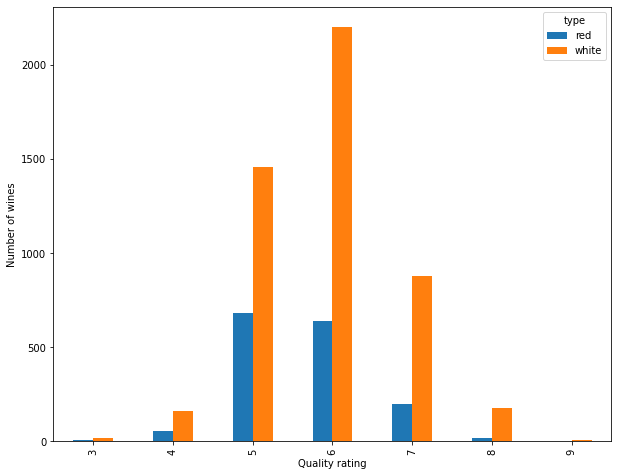

In [4]:
ax = wine_data.groupby(['type','quality'])['quality'].count().unstack(0).plot.bar(figsize=(10,8))
_ = ax.set_xlabel('Quality rating')
_ = ax.set_ylabel('Number of wines');

## Confusion matrix: prediction accuracy

The matrix below is a heatmap showing the most accurate predictions. In general, predictions of wines with a predicted rating of 5-7 tend to be more accurate, while lower and higher ratings are less accurate. This is in part because the dataset contains fewer wines with higher and lower ratings.

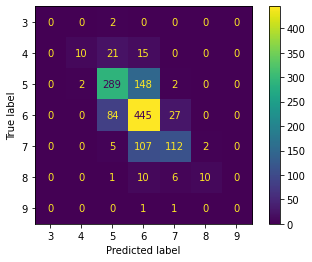

In [5]:
# Plot the confusion matrix given the true and predicted labels
y_preds = clf.predict(x_test)
cmp = ConfusionMatrixDisplay.from_predictions(y_true=y_test, y_pred=y_preds);

### Raw data

This table shows some of the raw data used to generate the quality prediction and the visualizations. For the complete dataset, see the [Wine Quality Dataset](https://www.kaggle.com/ruthgn/wine-quality-data-set-red-white-wine) on Kaggle.

In [6]:
wine_data.head(20)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.70,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.60,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.90,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.50,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.50,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
5,white,8.1,0.28,0.40,6.90,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
6,white,6.2,0.32,0.16,7.00,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6
7,white,7.0,0.27,0.36,20.70,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
8,white,6.3,0.30,0.34,1.60,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
9,white,8.1,0.22,0.43,1.50,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6
